# Imports
* Import all modules used in this notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Fetch data from CSV files
* Provided with test.csv and train.csv
* Read data in using Pandas
* Inspect the data sets


In [4]:
test_data = pd.read_csv('../input/digit-recognizer/test.csv')
train_data = pd.read_csv('../input/digit-recognizer/train.csv')

In [5]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocess Data
* Split train data into X_train and y_train.
    * X_train will consist of all columns except 'label' column
    * y_train will consist of only the 'label' column
* The given test data does not have a 'label' column, so no need for preprocessing

In [7]:
X_train = train_data.drop(labels=["label"], axis=1)
y_train = train_data["label"]

X_test = test_data

# Normalize Data
* The given images contain pixels with values in the range of 0-255
* We want to normalize these values into a value between 0.0 and 1.0 in order to make calculations easier and allow our model to learn at a faster rate

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

# Reshape Data
* The data provided is formatted as 784 pixels, but we want to reshape our data to represent 28x28 pixel images

In [9]:
print("Original X_train: ", X_train.shape)
print("Original X_test: ", X_test.shape)

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

print("Reshaped X_train: ", X_train.shape)
print("Reshaped X_test: ", X_test.shape)

Original X_train:  (42000, 784)
Original X_test:  (28000, 784)
Reshaped X_train:  (42000, 28, 28, 1)
Reshaped X_test:  (28000, 28, 28, 1)


# One-hot-encode
* Since we want to classify our data into ten classes (for digits 0-9) we can one hot encode our y_train with 10 values.

In [10]:
y_train = to_categorical(y_train, num_classes=10)

# Create Validation Set
* From our training data, we will extract a validation set to use when training our model
* We will use a 90%-10% training-validation split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=144)

# Create Model
* Initialize a convolutional neural network
* Utilize dropout layers in order to deal with the model overfitting
* Compile the model using the Adam optimizer

In [12]:
model = Sequential()

model.add(Conv2D(filters = 64,
                   kernel_size = (5, 5),
                   padding = 'same',
                   activation = 'relu',
                   input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64,
               kernel_size = (3, 3),
               padding = 'same',
               activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128,
               kernel_size = (5, 5),
               padding = 'same',
               activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128,
               kernel_size = (3, 3),
               padding = 'same',
               activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         2

In [13]:
model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Data Augmentation
* Generate augmented data from our training training data using the ImageDataGenerator
* We don't want to have generated data that is vertically or horizontally flipped, for the case of 9 and 6

In [14]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = False,
    vertical_flip = False)

datagen.fit(X_train)

# Train our Model
* Fit the model over 30 epochs
* Found that a batch size of 64 worked well
* We use ReduceLROnPlateau in order to half the learning rate when the validation accuracy flattens out over 3 epochs, helping our model better locate a minimum during optimization

In [15]:
epochs = 30
batch_len = 64

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_len),
                   steps_per_epoch = len(X_train) // batch_len,
                   epochs = epochs,
                   validation_data = (X_val, y_val),
                   callbacks = [learning_rate_reduction])

Epoch 1/30
590/590 [==============================] - 97s 163ms/step - loss: 0.8428 - accuracy: 0.7033 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 2/30
590/590 [==============================] - 95s 161ms/step - loss: 0.1025 - accuracy: 0.9702 - val_loss: 0.0497 - val_accuracy: 0.9860
Epoch 3/30
590/590 [==============================] - 95s 161ms/step - loss: 0.0709 - accuracy: 0.9802 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 4/30
590/590 [==============================] - 94s 159ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 0.0326 - val_accuracy: 0.9905
Epoch 5/30
590/590 [==============================] - 95s 162ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0281 - val_accuracy: 0.9924
Epoch 6/30
590/590 [==============================] - 96s 162ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0275 - val_accuracy: 0.9917
Epoch 7/30
590/590 [==============================] - 95s 161ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0297 - val_ac

# Plot Loss and Accuracy

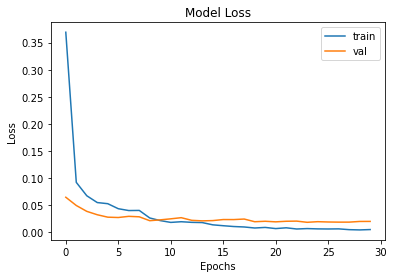

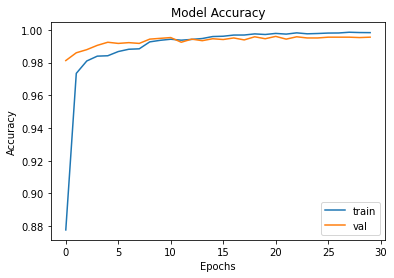

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

# Predict Test Data
* Using our model, we can predit which digit each of the images given in our test set is
* Store our model's predictions in a csv file

In [17]:
res = model.predict(X_test)
res = np.argmax(res, axis = 1)
res = pd.Series(res, name="Label")

In [18]:
result = pd.concat([pd.Series(range(1,28001),name = "ImageId"),res],axis = 1)

result.to_csv("result.csv",index=False)